In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('clustered_data.csv')

In [111]:
from sklearn.preprocessing import RobustScaler
robust_scaler=RobustScaler()
df_scaled=robust_scaler.fit_transform(df)

In [112]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principal_components=pca.fit_transform(df_scaled)
df_pca=pd.DataFrame(data=principal_components,columns=['PC1','PC2'])

KMEANS

In [113]:
from sklearn.cluster import KMeans
wcss=[]   #wcss value decreases as the k value increases
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmeans.fit(df_pca)
  wcss.append(kmeans.inertia_)

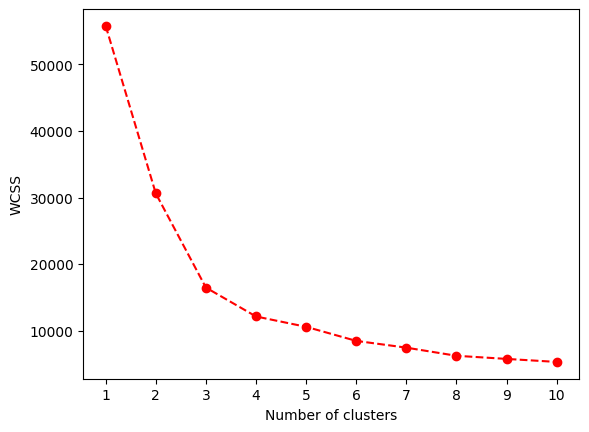

In [114]:
plt.plot(range(1,11),wcss,color='red',marker='o',linestyle='--')
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [115]:
from kneed import KneeLocator
#validating k value
k=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [116]:
k.elbow

np.int64(3)

In [117]:
kmeans=KMeans(n_clusters=k.knee,init='k-means++',random_state=42)
y_pred_kmeans=kmeans.fit_predict(df_pca)

In [118]:
from sklearn.metrics import silhouette_score
score_kmeans=silhouette_score(df_pca,kmeans.labels_)
score_kmeans

0.4535875054882248

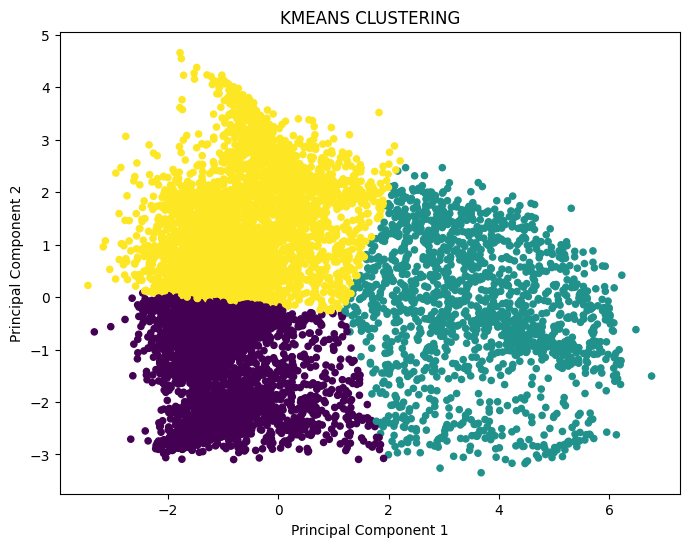

In [119]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1],c=y_pred_kmeans,s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMEANS CLUSTERING')
plt.show()

HIERARCHICAL

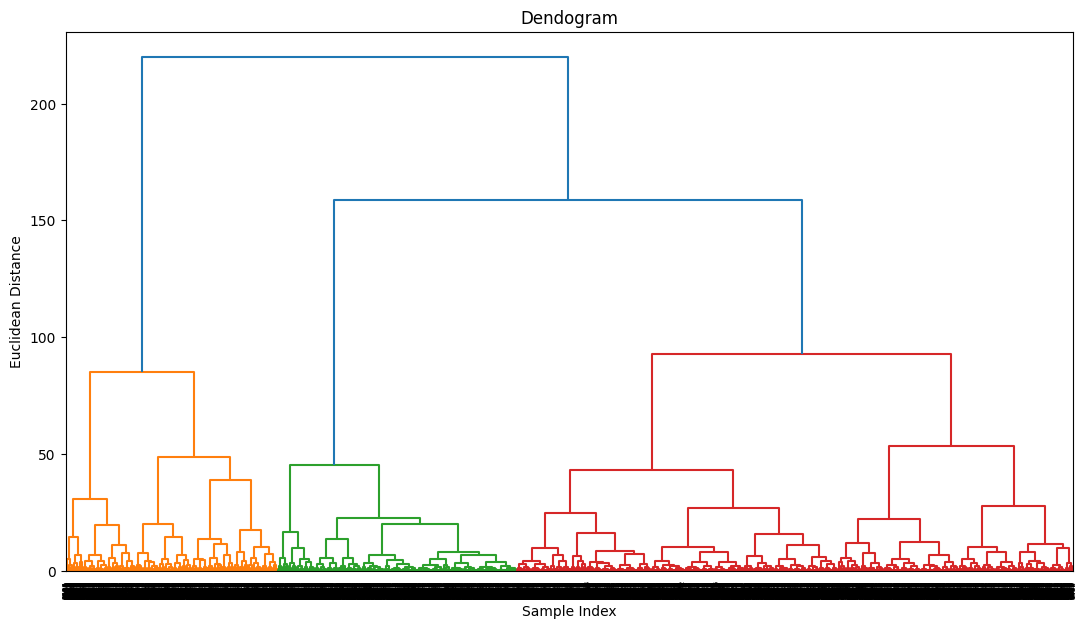

In [120]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(13,7))
dendrogram(linkage(df_pca,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

In [121]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_pred_agg=agg.fit_predict(df_pca)

In [122]:
from sklearn.metrics import silhouette_score
score_agg=silhouette_score(df_pca,agg.labels_)
score_agg

0.4817831219652552

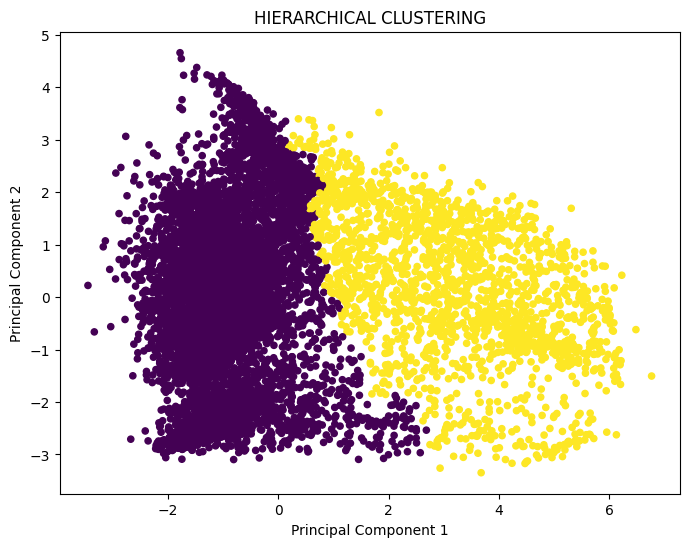

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1],c=y_pred_agg,s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('HIERARCHICAL CLUSTERING')
plt.show()

DBSCAN

In [124]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.3)
y_pred_dbscan=dbscan.fit_predict(df_pca)

In [125]:
from sklearn.metrics import silhouette_score
score_dbscan=silhouette_score(df_pca,dbscan.labels_)
score_dbscan

0.349409883842099

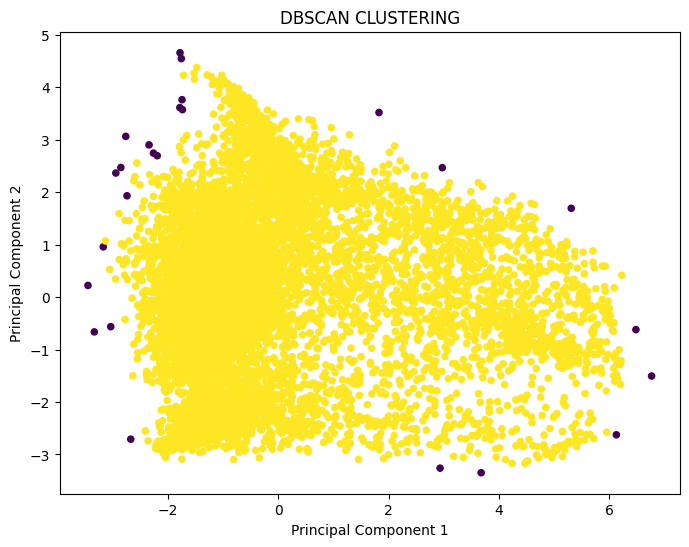

In [126]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1],c=y_pred_dbscan,s=20)
plt.title('DBSCAN CLUSTERING')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [127]:
score={
  'Model': ['KMeans','Hierarchical','DBSCAN'],
  'Silhouette Score': [score_kmeans,score_agg,score_dbscan]
}

df_score=pd.DataFrame(score)
df_score

,Model,Silhouette Score
0,KMeans,0.453588
1,Hierarchical,0.481783
2,DBSCAN,0.349410
